# Análise do teste piloto para definição de tamanho de amostra
Considerando os algoritmos:
- Merge Sort Top-Down 3 subarrays (TD3)
- Merge Sort Top-Down 2 subarrays(TD2)
- Merge Sort Bottom UP (BU)

Passos

1. Visualização de dados
1. Extração do número de amostras mínimo para cada um dos algoritmos
$K_{minimo}^{i}\geq(\frac{t_{\alpha}*\alpha}{E})^{2}$

$t_{\alpha}^{i}=\frac{(\bar{x}^{0}-\bar{x}^{i})*\sqrt(n)}{variance^{0}}$

1. Definição do número mínimo entre todos os algoritmos

$K_{minimo}=min(K_{minimo}^{i})$



In [2]:
import os
import sys
import numpy as np
from scipy.stats import t
from config import data_dir

## Visualização

In [19]:
from numpy import genfromtxt
data = genfromtxt(os.path.join(data_dir,"raw","timePilot.csv"), delimiter=',')

In [3]:
import pandas as pd
databd=pd.read_csv(os.path.join(data_dir,"raw","timePilot.csv"),names=["TD3","TD2","BU"])
databd.describe()

,TD3,TD2,BU
count,100.000000,100.000000,100.000000
mean,116.030000,120.580000,109.460000
std,19.476718,20.507294,19.252401
min,103.000000,108.000000,97.000000
25%,107.000000,112.000000,101.000000
50%,109.500000,113.000000,102.500000
75%,112.000000,117.000000,107.000000
max,214.000000,224.000000,210.000000


In [20]:
td3_data=data[:,0]
td2_data=data[:,1]
bu_data=data[:,2]

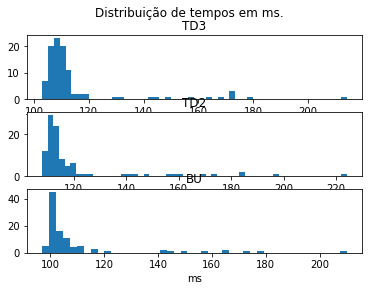

In [21]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3)
fig.suptitle('Distribuição de tempos em ms.')

axs[0].hist(td3_data, bins='auto')
axs[0].set_title('TD3')

axs[1].hist(td2_data, bins='auto')
axs[1].set_title('TD2')

axs[2].hist(bu_data, bins='auto')
axs[2].set_title('BU')
axs[2].set_xlabel('ms')

plt.show()

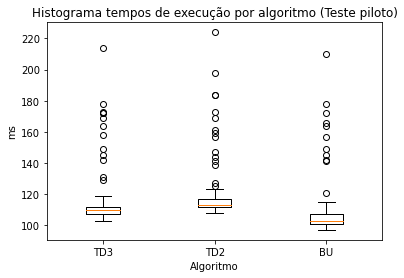

In [22]:
fig,ax=plt.subplots()
hist_tempos=ax.boxplot(data,labels=["TD3","TD2","BU"])
ax.set_ylabel("ms")
ax.set_xlabel("Algoritmo")
ax.set_title("Histograma tempos de execução por algoritmo (Teste piloto)")
path=os.path.join(data_dir, "processed", "images","hist_piloto.jpg")
plt.savefig(path)
plt.show()

## Numero de amostra minima
$K_{minimo}^{i}$

### Erro Máximo

In [23]:
def print_statistics(a):
    print("Mean: ",a.mean())
    print("Standard Dev: ",a.std())

def get_max_std_dev(a):
    _,cols=a.shape
    std_dev=np.zeros(cols)
    for j in range(0,cols):
        std_dev[j]=a[:,j].std()
    return np.max(std_dev)

In [24]:
print_statistics(td3_data)
print_statistics(td2_data)
print_statistics(bu_data)

Mean:  116.03
Standard Dev:  19.379089245885627
Mean:  120.58
Standard Dev:  20.404499503785924
Mean:  109.46
Standard Dev:  19.155897264289134


In [25]:
max_std_dev=get_max_std_dev(data)

In [26]:
pc_max_std_dev=0.1
max_error_tol=max_std_dev*pc_max_std_dev
print("Erro máximo tolerado ms: ",max_error_tol)

Erro máximo tolerado ms:  2.0404499503785924


### Calcula o número minimo de amostras

In [42]:
from scipy.stats import t
# Calculate the t student coefficient for a given confidence level. 
# Considering a cdf distribution.
# alpha =Confidence level
# lf=Graus de liberdade
def get_t_student(alpha,lf):
    return abs(t.cdf(alpha,lf))
   
# Calculates the minimum number of samples, for cases that I do not have the standard deviation of my population. Using Barbetta et al. method.
# data = Array with the first column being the base case, whereas the following columns are the next cases to be compared against.
# alpha = Confidence level.
# max_error_tol = Maximum tolerated Error.
def get_min_num_samples(data,alpha,max_error_tol):
    rows,cols=data.shape
    k_min=np.zeros(shape=cols)
    #Get t student (Used when we don´t have information on the std dev of population)
    for i in range(0,cols):#Consider taking the first column as the base case for all of the columns
        k_min[i]=(get_t_student(alpha,rows-1)/max_error_tol)**2*np.var(data[:,i])
    return k_min

In [46]:
alpha=.95
k_min=get_min_num_samples(data,alpha,max_error_tol)
np.max(k_min)

68.52315792274013